# Week 8: Cascades on Networks

This notebook will introduce the ndlib package for spreading processes on networks

In [1]:
# import warnings
# warnings.filterwarnings('ignore')

import matplotlib
#matplotlib.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt

import networkx as nx
import numpy as np

In [2]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
%matplotlib inline
from collections import defaultdict

a4_dims = (11.7, 8.27)

no display found. Using non-interactive Agg backend


## Main function

The following function will generate a cascade on a given network `G`. It takes parameters `seed`, a list of initial seed adopters, `threshold`, the cascade threshold value, and `nosteps`, the number of steps for the iteration to run.

The graph is plotted such that the initial adopters are in hard purple, and each new wave of adopters is a slightly lighter purple.

In [9]:
def vis_cascade(G, seed, threshold, nosteps):
    
    no_nodes = len(G.nodes())
    model = ep.ThresholdModel(G)
    config = mc.Configuration()
    
    infected_initial = seed
    for i in G.nodes():
        config.add_node_configuration("threshold", i, threshold)
        
    config.add_model_initial_configuration("Infected", infected_initial)
    model.set_initial_status(config)
    
    infected = defaultdict(lambda: False)
    nodealpha = defaultdict(lambda: 1.0)

    iterations = model.iteration_bunch(nosteps)
    trends = model.build_trends(iterations)
    
    viz = DiffusionTrend(model, trends)

    for j in range(nosteps):
        for node in iterations[j]['status'].keys():
            if iterations[j]['status'][node]==1:
                nodealpha[node]=np.power(1.5, -j)
                infected[node]=True
                
    times = np.array(range(nosteps))
    no_infected = np.array([iterations[i]['node_count'][1] for i in range(nosteps)])/no_nodes

    fig, ax = plt.subplots(nrows=1,ncols=2,figsize = a4_dims)
    
    ax[1].plot(times,no_infected, linewidth=3)
    ax[1].set_xlabel("Time (iteration number)", fontsize=20)
    ax[1].set_ylabel("Proportion of adopters", fontsize=20)
    ax[1].set_ylim(0,1)

    pos = nx.spring_layout(G)
    pos = nx.kamada_kawai_layout(G,pos=pos)
    
    alphas = np.array([nodealpha[j] for j in G.nodes() if infected[j]])

    nodes = nx.draw_networkx_nodes(G, ax=ax[0], nodelist = [nd for nd in G.nodes() if infected[nd]], 
                           pos=pos, node_color='purple', alpha=alphas)
    
    nodes.set_edgecolor('black')
    nodes = nx.draw_networkx_nodes(G, ax=ax[0], nodelist = [nd for nd in G.nodes() if not infected[nd]], 
                           pos=pos, node_color='white')
    nodes.set_edgecolor('black')
    nx.draw_networkx_edges(G, ax=ax[0], pos=pos, alpha = 0.3)
    plt.show()

100%|██████████| 10/10 [00:00<00:00, 737.58it/s]


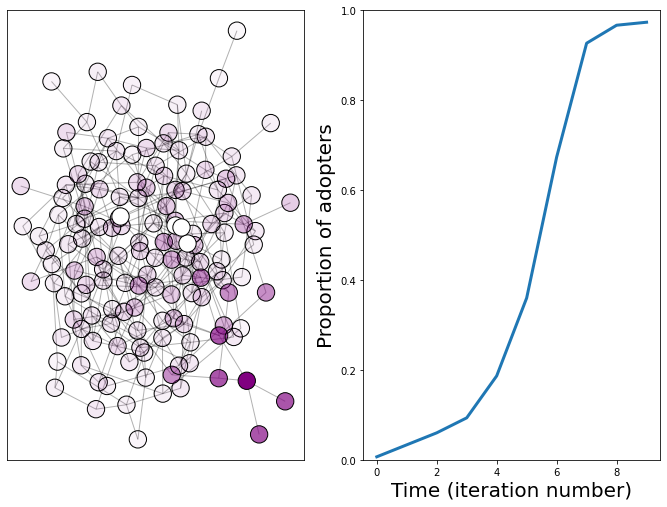

In [16]:
G = nx.gnm_random_graph(150,300)

# Select highest degree node as seed
seed = [sorted(G.degree, key=lambda x: x[1], reverse=True)[0][0]]

vis_cascade(G,[0],0.2,10)

100%|██████████| 10/10 [00:00<00:00, 1012.46it/s]

296


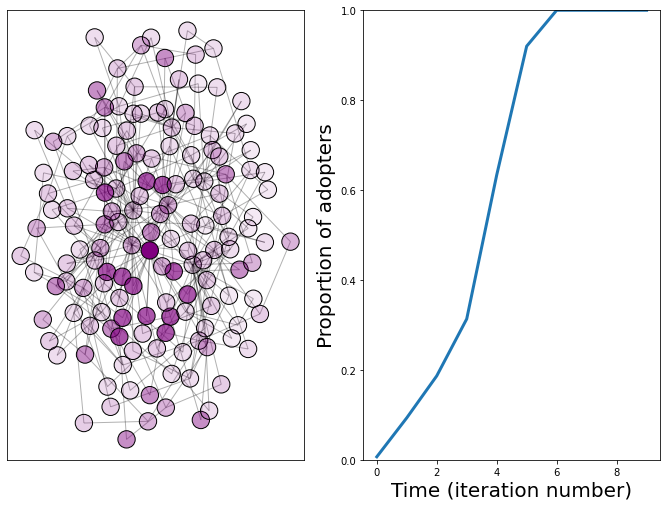

In [15]:
G = nx.barabasi_albert_graph(150, 2)
print(len(G.edges()))

# select highest degree node as seed
seed = [sorted(G.degree, key=lambda x: x[1], reverse=True)[0][0]]

vis_cascade(G,seed,0.2,10)

100%|██████████| 10/10 [00:00<00:00, 479.52it/s]


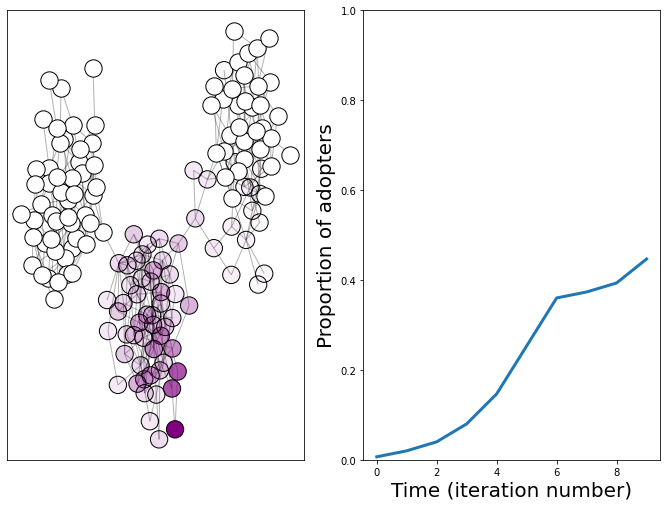

In [18]:
G = nx.planted_partition_graph(3, 50, 0.1, 0.0005)

vis_cascade(G,seed,0.2,10)